In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud


original_df = pd.read_parquet('/kaggle/input/processed-un-speeches')


In [2]:
def clean_standardize(df:pd.DataFrame):
    df[['country','session','year']] = df['context'].str.split('_',expand=True)
    df['year'] = df['year'].str.replace('.txt','')
    df['year'] = pd.to_datetime(df['year'])
    df['year'] = df['year'].dt.year
    df['entities'] = df['entities'].str.lower()
    df['entities'] =  df['entities'].str.replace('united\\nnations','',regex=True) # United Nations mentions are implicit, removing
    df = df[~ df['entities'].str.contains('the united nations|united nations|united nation')] # United Nations mentions are implicit, removing
    df = df.drop(columns=['context','session'])
    return df

df = clean_standardize(original_df)

df

,entities,label,country,year
0,66,CARDINAL,COL,1975
1,the general assembly,ORG,COL,1975
2,thorn,PERSON,COL,1975
3,states,GPE,COL,1975
4,states,GPE,COL,1975
...,...,...,...,...
1437135,nicaragua,GPE,SYR,1985
1437136,the last 40 years,DATE,SYR,1985
1437137,hotbeds,ORG,SYR,1985
1437138,hundreds of millions,CARDINAL,SYR,1985


<h2>Gulf War (1990-1991):</h2>

What are the themes of United States speeches in this period?

What countries discussed the United States in their speeches the most?
    Of some of these top countries, what did they discuss?

In [3]:
gulf_war = (df.query('year >= 1990 and year <= 1991')
               .sort_values(by='year',ascending=False)
               .reset_index(drop=True)
              )

In [4]:
gulf_war_us = (gulf_war.loc[gulf_war['country'] == "USA"]
               .sort_values(by='year',ascending=False)
               .reset_index(drop=True)
              )

What are the themes of United States speeches in this period?

<Axes: title={'center': 'US Gulf War Speeches'}, xlabel='entities'>

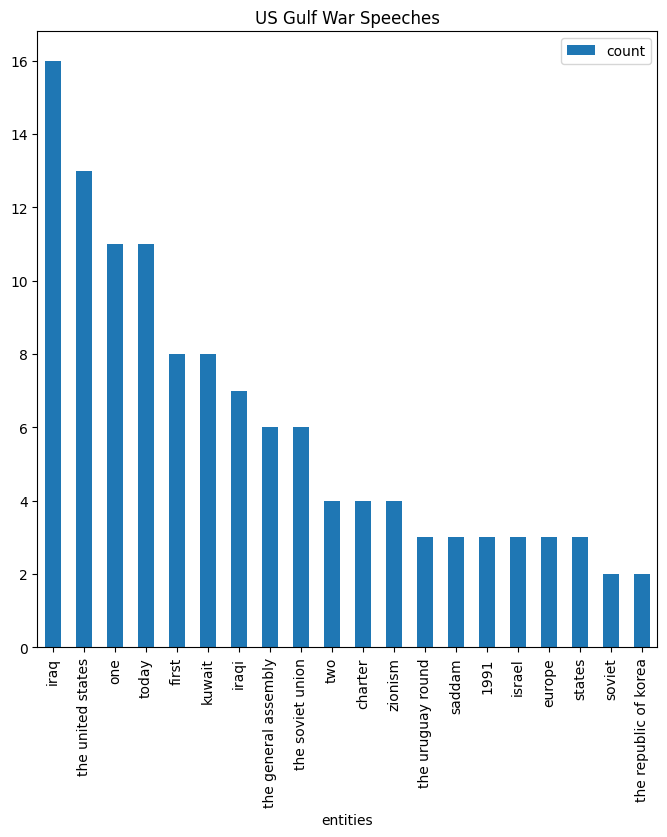

In [5]:

gulf_war_us_count = ((gulf_war_us['entities']
                      .value_counts()
                      .reset_index()
                      .sort_values(by='count',ascending=False)
                      .head(20)
                      ))

gulf_war_us_count.plot(kind='bar',
                       x='entities',
                       y='count',
                       title='US Gulf War Speeches',
                       figsize=(8,8)
                      )

What countries discussed the United States in their speeches the most?
    Of some of these top countries, what did they discuss?

<Axes: title={'center': 'Top Countries Discussing US in Gulf War'}, xlabel='country'>

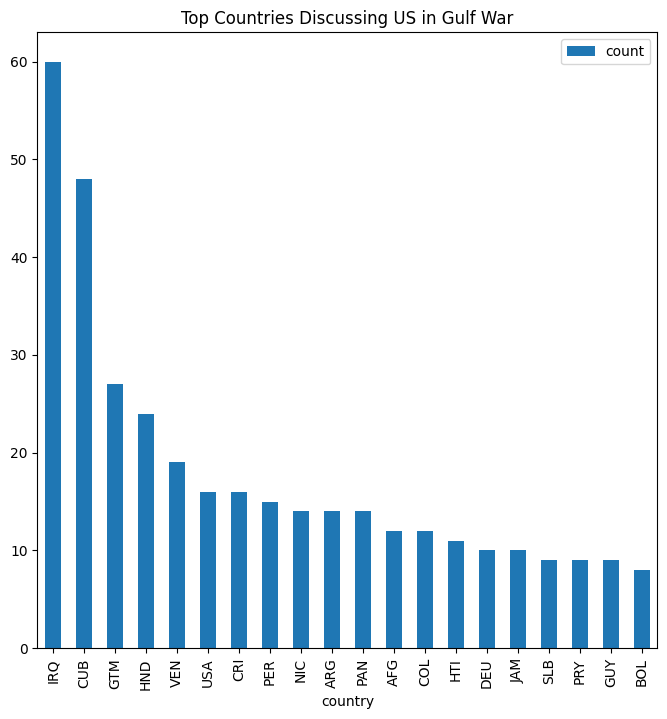

In [6]:
gulf_war_countries_us = (gulf_war.query('entities.str.contains("the united states|american")')
                        .sort_values(by='year',ascending=False)
                        .reset_index(drop=True)
                        )

gulf_war_countries_count = ((gulf_war_countries_us['country']
                             .value_counts()
                             .reset_index()
                             .head(20)
                             ))

#fig = px.bar(gulf_war_countries_count,x='country',y='count',height=500,width=900)

#fig.show()

gulf_war_countries_count.plot(kind='bar',
                       x='country',
                       y='count',
                       title='Top Countries Discussing US in Gulf War',
                       figsize=(8,8)
                      )

IRQ, USA, and AFG make sense. CUB definitely surprised me, but Cuba condemned both Iraq's invasion of Kuwait and US military operations in the Gulf.

<h2>Iraq War and 9/11 (2001-2011):</h2>

What are the themes of United States speeches in this period?

What countries discussed Iraq in their speeches the most?
    Of some of these top countries, what did they discuss?

What was the world discussing in their speeches?

In [7]:
iraq_911 = (df.query('year >= 2001 and year <= 2011')
               .sort_values(by='year',ascending=False)
               .reset_index(drop=True)
              )

What are the themes of United States speeches?

<Axes: title={'center': 'Themes of US Speeches during Iraq War and 9/11'}, xlabel='entities'>

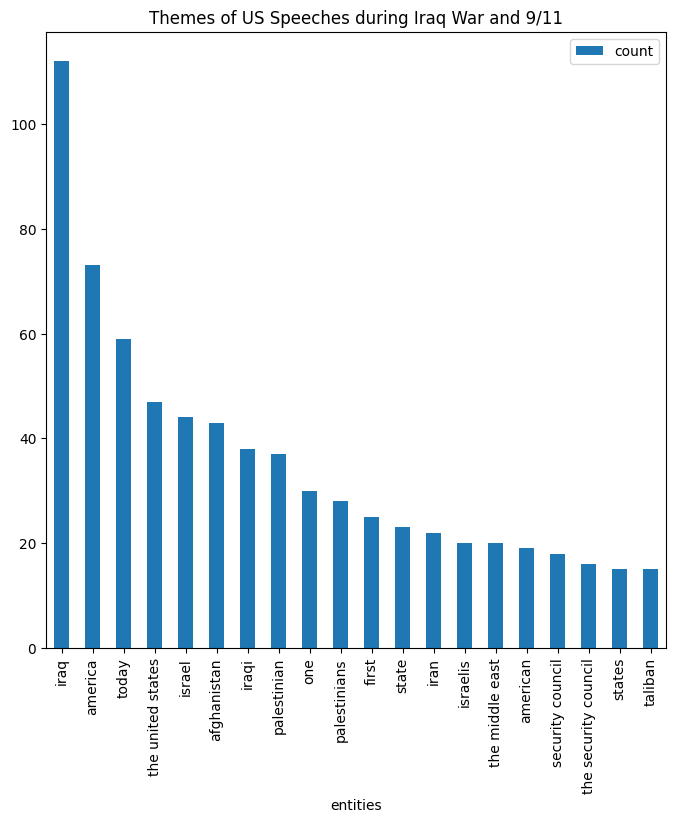

In [8]:
iraq_911_us = iraq_911.loc[iraq_911['country'] == "USA"]
            
iraq_911_us_count = ((iraq_911_us['entities']
                      .value_counts()
                      .reset_index()
                      .sort_values(by='count',ascending=False)
                      .head(20)
                      ))


iraq_911_us_count.plot(kind='bar',
                       x='entities',
                       y='count',
                       title='Themes of US Speeches during Iraq War and 9/11',
                       figsize=(8,8)
                      )

The themes are much of what you would expect- discussing countries/nationalities in the middle east.

This conflict was quite long though (10+ years). How did the speeches evolve over that time frame?

Text(0, 0.5, 'count')

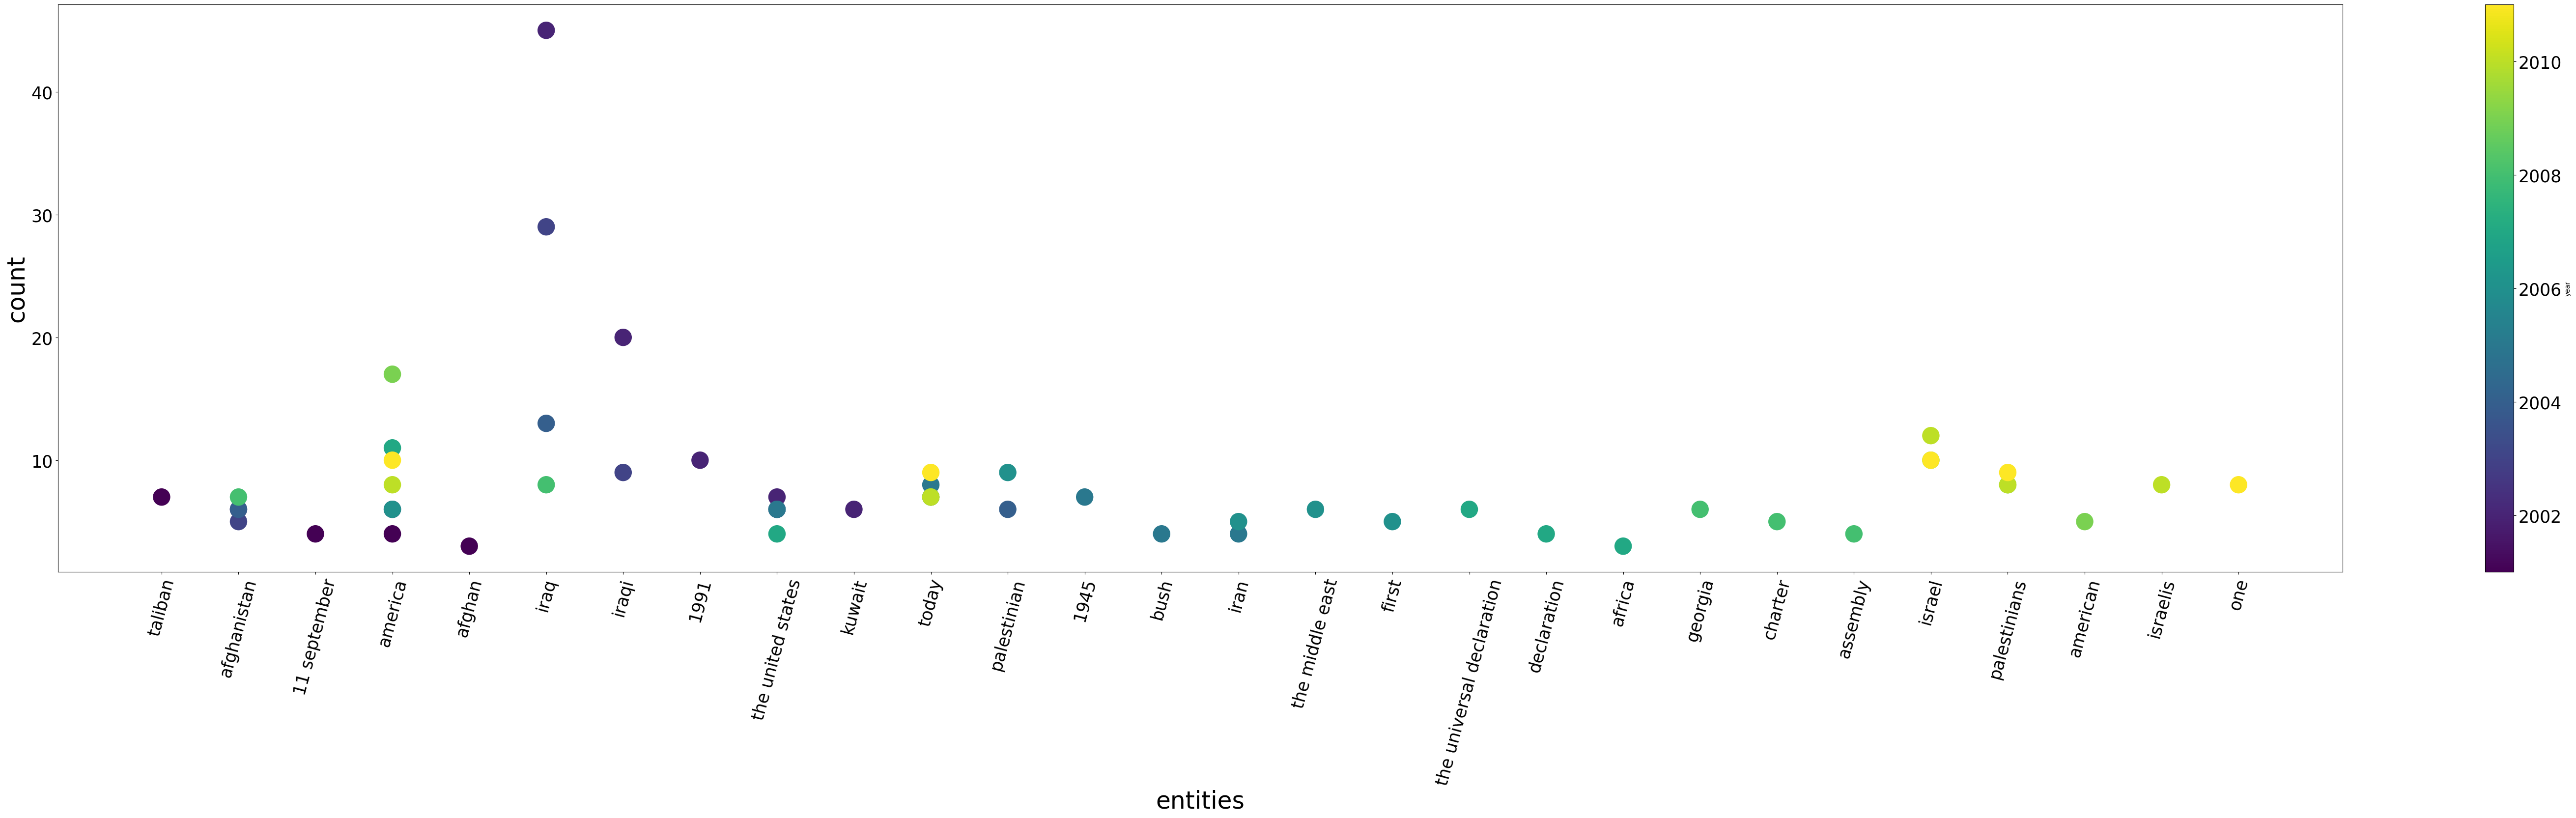

In [9]:
iraq_911_us_evo =  (iraq_911_us
                    .groupby('year')['entities']
                    .value_counts()
                    .reset_index()
                    .groupby('year')
                    .head(5)
                  )

fig = iraq_911_us_evo.plot(kind='scatter',
                     x='entities',
                     y='count',
                     colorbar=True,
                     colormap='viridis',
                     c='year',
                     s=600,
                     fontsize=25,
                     rot=75,
                     figsize=(75,15)
                    )

colorbar = fig.figure.axes[1]
colorbar.tick_params(labelsize=25)

plt.xlabel('entities',fontsize=35)
plt.ylabel('count',fontsize=35) 
    

Overall, we can see the earliest speeches focused on the Taliban, Afghanistan, September 11th and Iraq.

I was a bit surprised that Iraq dropped off after 2004, with one return in 2008.

"1991" must have been referencing the first Gulf War (1990-1991)

"1945" could have been a reference to two events in that year: 1) Iraq becoming a founding member of the UN, 2) The Regent of Iraq visiting the United States in an effort to strengthen the relationship.

Starting in 2004 onward, we start to see several other countries being discussed. For example, Palestine/Palestians were mentioned due to them being forced out of Iraq due to the war.



What countries discussed Iraq in their speeches the most?
    Of some of these top countries, what did they discuss?

<Axes: title={'center': 'Top Countries Discussing Iraq'}, xlabel='country'>

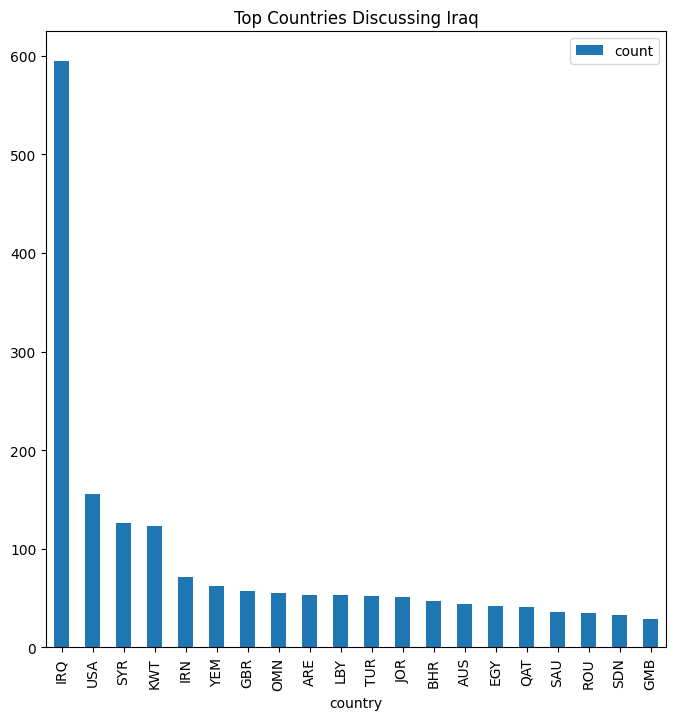

In [10]:
iraq_911_countries = ((iraq_911
                          .query('entities.str.contains("iraq|iraqi")')
                          .sort_values(by='year',ascending=False)
                          .reset_index(drop=True)
                          ))

iraq_911_countries_count = ((iraq_911_countries['country']
                     .value_counts()
                     .reset_index()
                     .sort_values(by='count',ascending=False)
                     .head(20)
                     ))


iraq_911_countries_count.plot(kind='bar',
                       x='country',
                       y='count',
                       title='Top Countries Discussing Iraq',
                       figsize=(8,8)
                      )

What did Iraq, Syria, and Kuwait discuss in their speeches?

<Axes: title={'center': 'Iraq Speeches During Iraq War'}, xlabel='entities'>

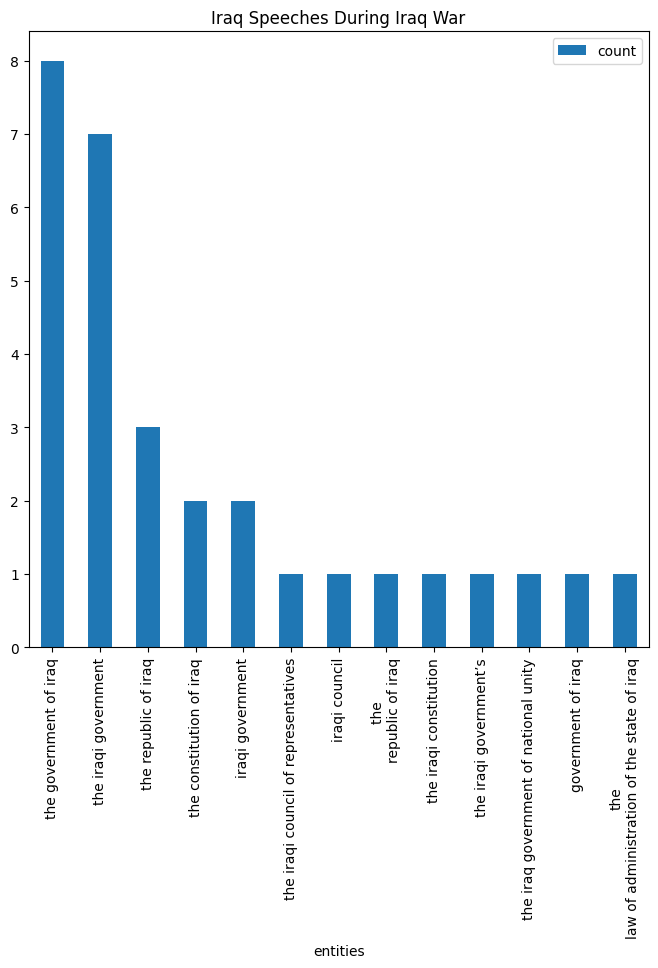

In [11]:
iraq_911_irq = iraq_911_countries.loc[iraq_911_countries['country'] == 'IRQ']

iraq_911_irq = iraq_911_irq[~ iraq_911_irq['entities'].isin(['iraq','iraqi','iraqis'])]

iraq_911_irq_count = ((iraq_911_irq['entities']
                       .value_counts()
                       .reset_index()
                       .sort_values(by='count',ascending=False)
                       .head(20)  
                     ))

iraq_911_irq_count.plot(kind='bar',
                       x='entities',
                       y='count',
                       title='Iraq Speeches During Iraq War',
                       figsize=(8,8)
                      )

<Axes: title={'center': 'Syria Speeches During Iraq War'}, xlabel='entities'>

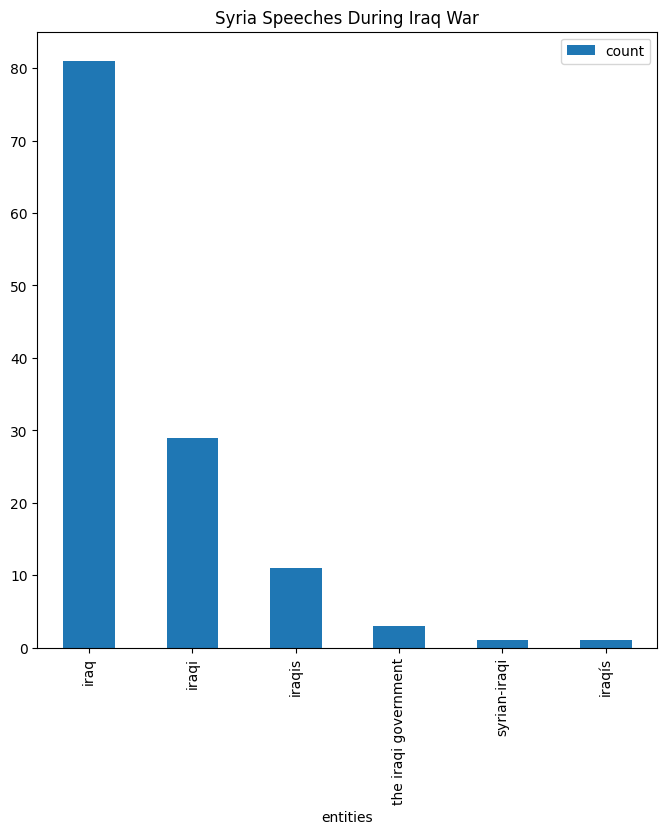

In [12]:
iraq_911_syr = iraq_911_countries.loc[iraq_911_countries['country'] == 'SYR']

iraq_911_syr_count = ((iraq_911_syr['entities']
                       .value_counts()
                       .reset_index()
                       .sort_values(by='count',ascending=False)
                       .head(20)  
                     ))

iraq_911_syr_count.plot(kind='bar',
                       x='entities',
                       y='count',
                       title='Syria Speeches During Iraq War',
                       figsize=(8,8)
                      )

<Axes: title={'center': 'Kuwait Speeches During Iraq War'}, xlabel='entities'>

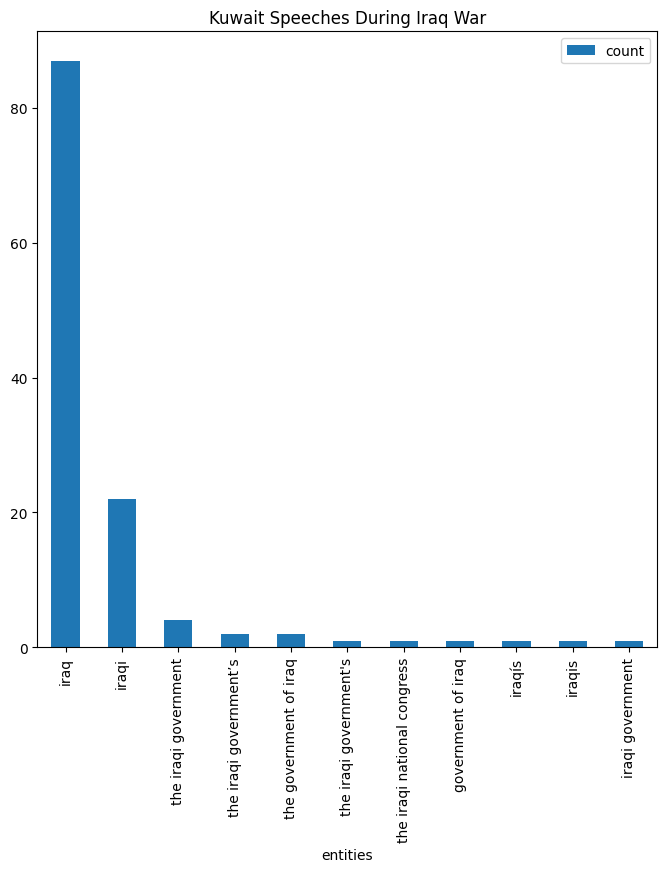

In [13]:
iraq_911_kwt = iraq_911_countries.loc[iraq_911_countries['country'] == 'KWT']

iraq_911_kwt_count = ((iraq_911_kwt['entities']
                       .value_counts()
                       .reset_index()
                       .sort_values(by='count',ascending=False)
                       .head(20)  
                     ))

iraq_911_kwt_count.plot(kind='bar',
                       x='entities',
                       y='count',
                       title='Kuwait Speeches During Iraq War',
                       figsize=(8,8)
                      )

Iraq and Kuwait engaged in more specific subjects (government, council, constitution, etc) vs Syria (largely just Iraq, Iraqi, and Iraqis)

What was the world discussing in their speeches?

Going to focus on the first 4 years of the war

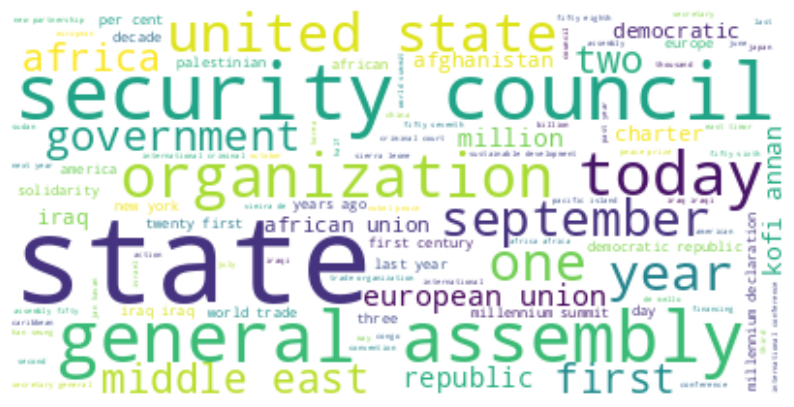

In [14]:

iraq_911_start = iraq_911.query('year >= 2001 and year <= 2004')

def generate_word_cloud(data:pd.DataFrame):
    text = " ".join(i for i in data['entities'])
    wordcloud = WordCloud(background_color="white").generate(text)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis("off")
    return plt.show()

generate_word_cloud(iraq_911_start)

<h2>What is the total count of United States mentions over the whole timeline?</h2>

<Axes: title={'center': 'Total Count of US Mentions by Year'}, xlabel='year'>

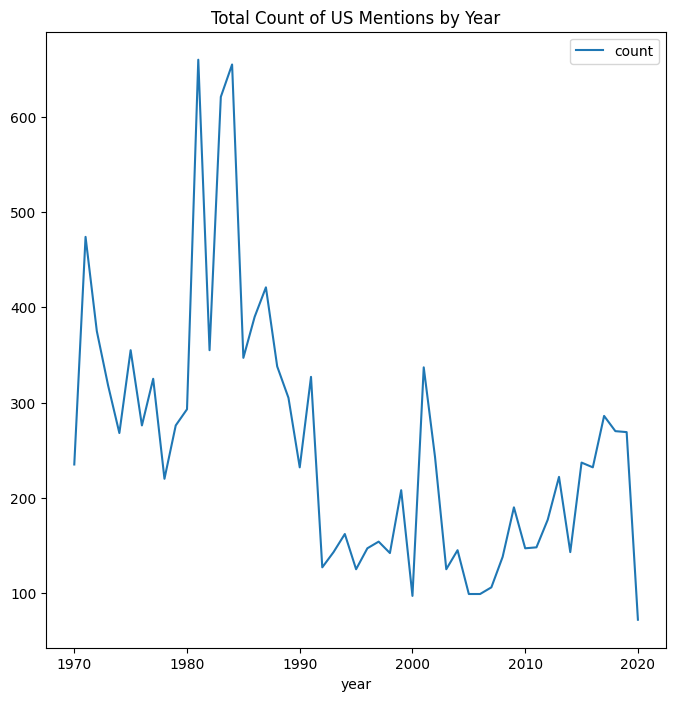

In [15]:
us_total_mentions = df.query('entities.str.contains("united states|the united states")')

us_mention_count = us_total_mentions['year'].value_counts().reset_index().sort_values(by='year')

us_mention_count.plot(kind='line',
                       x='year',
                       y='count',
                       title='Total Count of US Mentions by Year',
                       figsize=(8,8)
                      )

The most notable spike is in 1981-1984- what countries were talking about the U.S.?

The events of 9/11 cause a spike, followed by a gradual rise until 2019. 2020 saw the last volume since the beginning of the dataset, which could be due to COVID-19.

<Axes: title={'center': 'US Speeches in Early 80s'}, xlabel='country'>

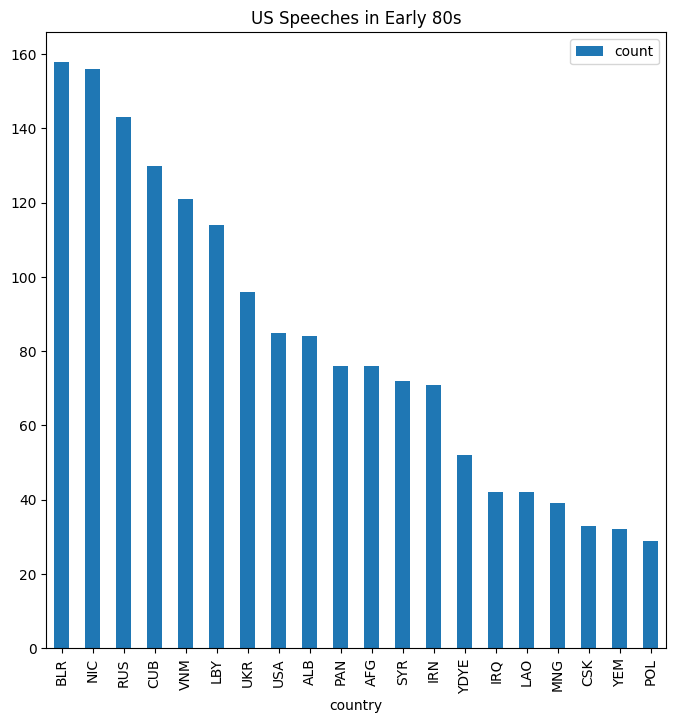

In [16]:
us_early_80s = us_total_mentions.query('year >= 1981 and year <= 1984')

us_early_80s_countries = us_early_80s['country'].value_counts().reset_index().sort_values(by='count',ascending=False).head(20)

us_early_80s_countries.plot(kind='bar',
                       x='country',
                       y='count',
                       title='US Speeches in Early 80s',
                       figsize=(8,8)
                      )

This makes sense due to the early 80's being a contentious period of the Cold War for President Reagan.

Belarus and Russia were part of the Soviet Union and the Nicaraguan Revolution made the country a proxy war battleground of the Cold War.